## Observations and Insights 

1. The drug regimen Ramicane appears to be the most effective in reducing tumor volume based on the final tumor volume results shown in the box and whisker plot, having the lowest mean, median, variance and standard deviation.
2. The correlation and regression shows us there is a strong postiive relationship between mouse weight and tumor volume.
3. Infubinol and ceftamin were the least effective drugs in this study, with Capomulin and ramicane being more effective.

In [284]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [285]:
# Checking the number of mice.
len(combined_df["Mouse ID"].value_counts())


249

In [286]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID" , "Timepoint"])]
duplicate_mice
duplicate_rows = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_rows

array(['g989'], dtype=object)

In [287]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = combined_df.loc[combined_df["Mouse ID"] == "g989"]
all_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [288]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df[combined_df["Mouse ID"].isin(duplicate_rows)==False]
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [289]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [290]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_regimens = clean_combined_df.groupby(["Drug Regimen"])

mean = drug_regimens["Tumor Volume (mm3)"].mean()
median = drug_regimens["Tumor Volume (mm3)"].median()
variance = drug_regimens["Tumor Volume (mm3)"].var()
standard_deviation = drug_regimens["Tumor Volume (mm3)"].std()
sem = drug_regimens["Tumor Volume (mm3)"].sem()

regimens_summary_df = pd.DataFrame({"Mean": mean,"Median":median,"Variance": variance,"Standard Deviation":standard_deviation,"SEM":sem})
regimens_summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [291]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
regimens_summary_df2 = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
regimens_summary_df2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of mice tested')

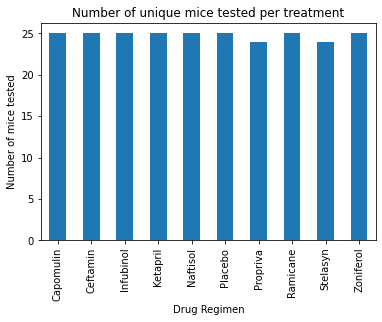

In [292]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treatment_plot = clean_combined_df.groupby("Drug Regimen")["Mouse ID"].nunique()
#mice_treatment_bar_plot
mice_treatment_plot.plot(kind="bar")
plt.title("Number of unique mice tested per treatment")
plt.ylabel("Number of mice tested")

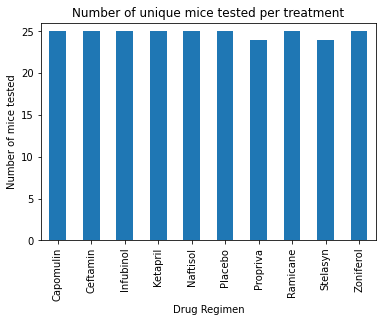

In [293]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_reg = clean_combined_df.groupby("Drug Regimen")["Mouse ID"].nunique()
x_axis = np.arange(len(drug_reg))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.bar(drug_reg.index, drug_reg, width=0.5)
#plt.show()

plt.xticks(tick_locations, drug_reg.index, rotation="vertical")

plt.title("Number of unique mice tested per treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")

plt.xlim(-0.5, len(mice_treatment_plot)-0.5)
plt.ylim(0,mice_treatment_plot.max()+1)

plt.show()

<AxesSubplot:title={'center':'Female versus Male distribution'}, ylabel='Sex'>

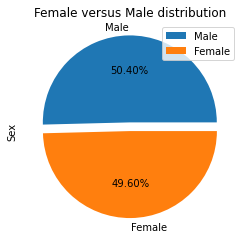

In [294]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_combined_df[["Mouse ID", "Sex"]].drop_duplicates()

gender_distribution = mouse_gender["Sex"].value_counts()
gender_distribution

explode = (0.1, 0)

gender_distribution_pie = gender_distribution.plot(kind="pie", title = "Female versus Male distribution", autopct="%1.2f%%", explode=explode)
gender_distribution_pie.legend(loc = "upper right")


gender_distribution_pie

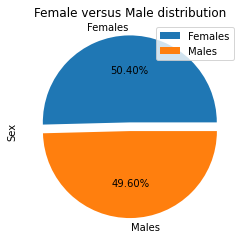

In [295]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ["Females", "Males"]
plt.pie(gender_distribution, labels=labels, autopct="%1.2f%%", explode=explode)
plt.title("Female versus Male distribution")
plt.ylabel("Sex")
plt.legend(loc = "upper right")

## Quartiles, Outliers and Boxplots

In [296]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_combined_df.groupby("Mouse ID")["Timepoint"].max()
#max_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tv_df = pd.merge(max_timepoint , clean_combined_df, on=["Mouse ID", "Timepoint"])
tv_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [297]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
for treatment in treatments:
    tv = tv_df.loc[tv_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol.append(tv)

    quartiles = tv.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    outliers = tv.loc[(tv > upper_bound) | (tv < lower_bound)]

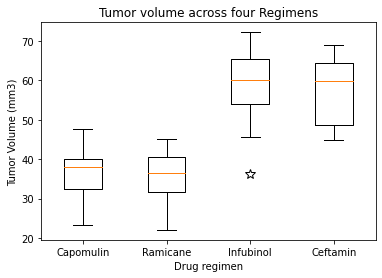

In [298]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flier = dict(marker="*", markersize=10)
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor volume across four Regimens")
ax1.set_xlabel("Drug regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, flierprops=flier, labels = treatments)

plt.show()

## Line and Scatter Plots

In [299]:
# See list of mice treated with Capomulin
capomulin_df = clean_combined_df.loc[clean_combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

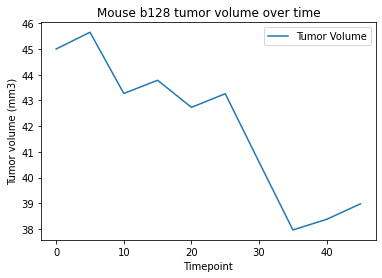

In [300]:
# I have chosen mouse b128
Mouse_b128 = clean_combined_df.loc[clean_combined_df["Mouse ID"] == "b128"]
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tv_y = Mouse_b128["Tumor Volume (mm3)"]
time_x = Mouse_b128["Timepoint"]

plt.plot(time_x, tv_y, label = "Tumor Volume")
plt.legend(loc="best")
plt.title("Mouse b128 tumor volume over time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor volume (mm3)")

plt.show()

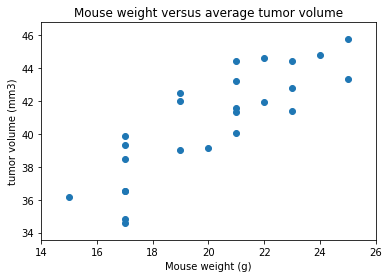

In [312]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mice = capomulin_df.groupby(["Mouse ID"]).mean()
#capomulin_mice
average_weight = capomulin_mice["Weight (g)"]
average_tumor_vol = capomulin_mice["Tumor Volume (mm3)"]

plt.scatter(average_weight, average_tumor_vol)
plt.title("Mouse weight versus average tumor volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("tumor volume (mm3)")
plt.xlim(average_weight.min()-1, average_weight.max()+1)
plt.ylim(average_tumor_vol.min()-1, average_tumor_vol.max()+1 )

plt.show()

## Correlation and Regression

In [302]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cc = round(st.pearsonr(average_weight, average_tumor_vol)[0],2)
cc
print(f"The correlation coefficient between mouse weight and average tumor volume is {cc}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


y = 0.95x + 21.55


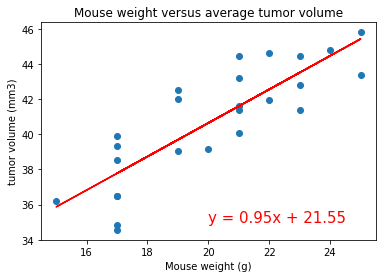

In [303]:
# Plot linear regression model on above scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_weight, average_tumor_vol)
regression_values = slope * average_weight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(average_weight, average_tumor_vol)
plt.plot(average_weight,regression_values,"r-")

plt.title("Mouse weight versus average tumor volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("tumor volume (mm3)")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.show()
